## This is the Notebook for the Deep Learning IIITDMJ 

# Day1: Setting up the Environment and Introduction to Deep Learning


In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

Plotting Logarithmic and Exponential Functions

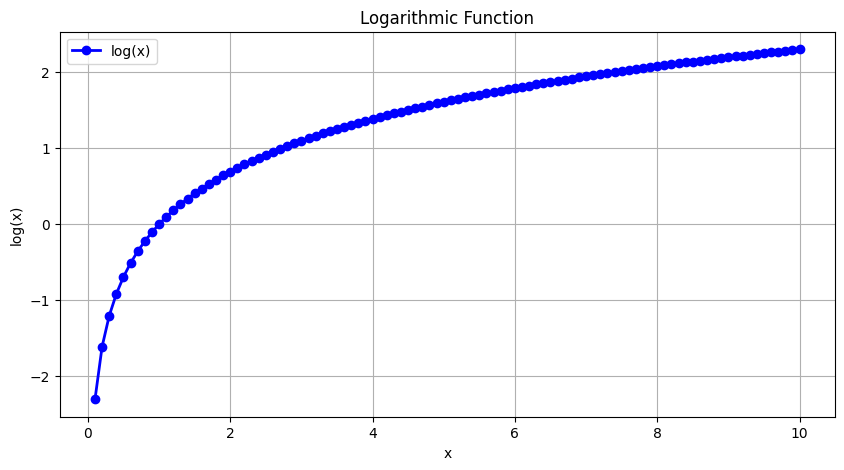

In [ ]:
#Log Plot
x = torch.linspace(0.1, 10, 100)  # Avoid zero to prevent log(0)
y = torch.log(x)
plt.figure(figsize=(10, 5))
plt.plot(x.numpy(), y.numpy(), label='log(x)', color='blue', linestyle='-', marker='o', linewidth=2)
plt.title('Logarithmic Function')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.grid(True)
plt.legend()
plt.show()

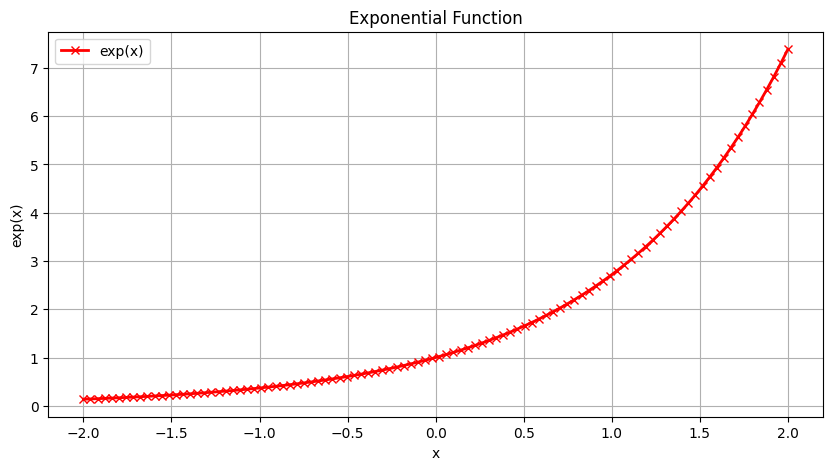

In [4]:
# Exponential Plot
x_exp = torch.linspace(-2, 2, 100)
y_exp = torch.exp(x_exp)
plt.figure(figsize=(10, 5))
plt.plot(x_exp.numpy(), y_exp.numpy(), label='exp(x)', color='red', linestyle='-', marker='x', linewidth=2)
plt.title('Exponential Function')
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.grid(True)
plt.legend()
plt.savefig('exponential_function.png')
plt.show()

## Vector and Matrix Transpose Using Pytorch and Numpy

In [4]:
#Using Pytorch
torch_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
torch_transpose = torch_tensor.T
print("Pytorch Transpose:")
print(torch_transpose)
#Using Numpy
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
numpy_transpose = numpy_array.T
print("Numpy Transpose:")
print(numpy_transpose)

Pytorch Transpose:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
Numpy Transpose:
[[1 4]
 [2 5]
 [3 6]]


## Dot Product using Numpy and Pytorch

In [5]:
# Using Pytorch
v_A = torch.tensor([1, 2, 3])
v_B = torch.tensor([4, 5, 6])
dot_product_pytorch = torch.dot(v_A, v_B)
print("Dot Product using Pytorch:", dot_product_pytorch.item())
# Using Numpy
v_A_np = np.array([1, 2, 3])
v_B_np = np.array([4, 5, 6])
dot_product_numpy = np.dot(v_A_np, v_B_np)
print("Dot Product using Numpy:", dot_product_numpy)

Dot Product using Pytorch: 32
Dot Product using Numpy: 32


## Softmax Function using Pytorch and Numpy

In [6]:
#With Numpy
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return e_x / e_x.sum(axis=0)
x = np.array([1.0, 2.0, 3.0])
softmax_values = softmax(x)
print("Softmax values without Pytorch or Numpy:", softmax_values)

Softmax values without Pytorch or Numpy: [0.09003057 0.24472847 0.66524096]


In [13]:
# With Pytorch Inbuilt Softmax
x_tensor = torch.tensor([1.0, 2.0, 3.0])
softmax_pytorch = torch.nn.functional.softmax(x_tensor, dim=0)
print("Softmax values using Pytorch:", softmax_pytorch)

#Verifying the sum of all elements in the softmax output
print("Sum of softmax values using Pytorch:", softmax_pytorch.sum().item())

Softmax values using Pytorch: tensor([0.0900, 0.2447, 0.6652])
Sum of softmax values using Pytorch: 1.0


## Entropy

In [14]:
def entropy(p):
    """
    Calculate the entropy of a probability distribution.
    
    Parameters:
    p (torch.Tensor): A tensor representing the probability distribution.
    
    Returns:
    float: The entropy of the distribution.
    """
    p = p[p > 0]  # Remove zero probabilities to avoid log(0)
    return -torch.sum(p * torch.log(p))

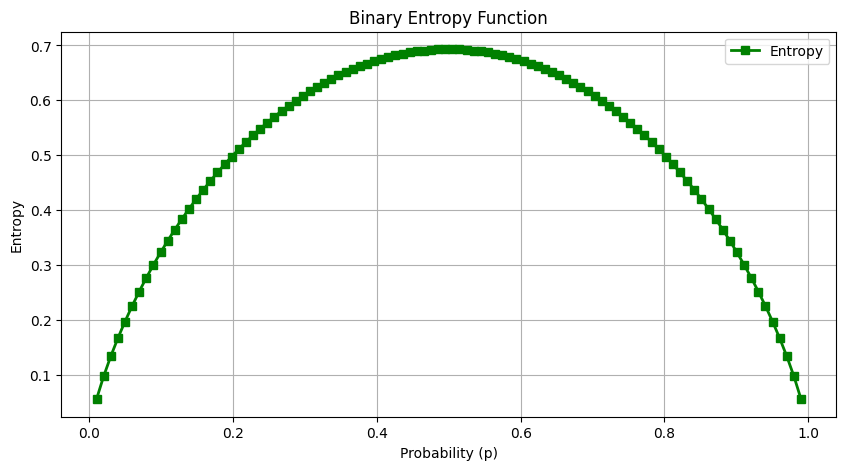

In [18]:
P_values = torch.linspace(0.01, 0.99, 100)  # Example probability values from 0.01 to 0.99
entropies = []
for p in P_values:
	# Calculate entropy for binary probability distribution [p, 1-p]
	dist = torch.tensor([p, 1-p])
	entropies.append(entropy(dist).item())

plt.figure(figsize=(10, 5))
plt.plot(P_values.numpy(), entropies, label='Entropy', color='green', linestyle='-', marker='s', linewidth=2)
plt.title('Binary Entropy Function')
plt.xlabel('Probability (p)')
plt.ylabel('Entropy')
plt.grid(True)
plt.legend()
plt.show()

Entropy of uniform distribution: 1.3862943649291992


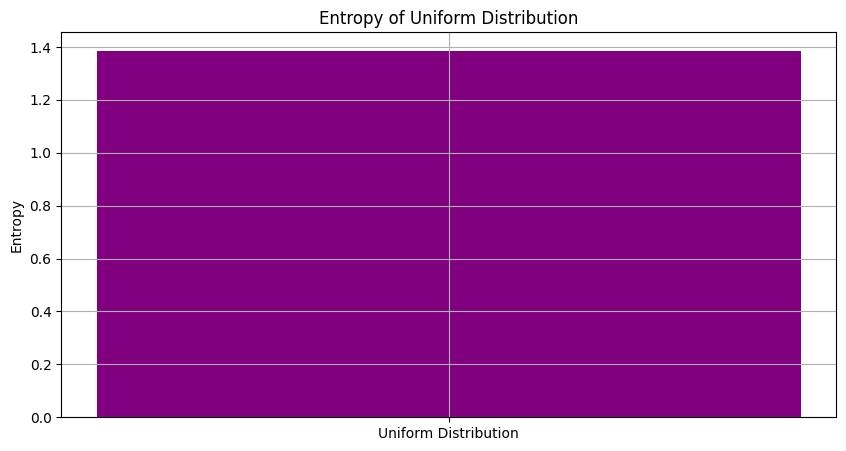

In [19]:
# Entropy of a uniform distribution
uniform_dist = torch.tensor([0.25, 0.25, 0.25, 0.25])  # Example uniform distribution
uniform_entropy = entropy(uniform_dist)
print("Entropy of uniform distribution:", uniform_entropy.item())
# Plot of Entropy of a uniform distribution
plt.figure(figsize=(10, 5))
plt.bar(['Uniform Distribution'], [uniform_entropy.item()], color='purple')
plt.title('Entropy of Uniform Distribution')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()


## Cross Entropy

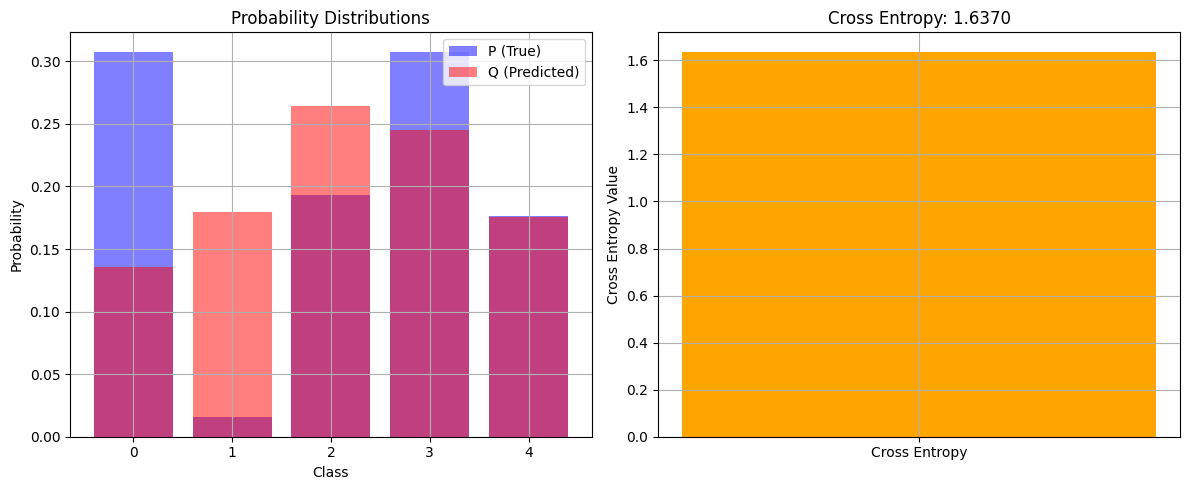

In [25]:
# Generate random probability distributions that sum to 1
P = torch.rand(5)
P = P / P.sum()  # normalize to make it a proper probability distribution
Q = torch.rand(5)
Q = Q / Q.sum()  # normalize to make it a proper probability distribution

# Calculate cross entropy
cross_entropy = -torch.sum(P * torch.log(Q))

# Plot the distributions and cross entropy
plt.figure(figsize=(12, 5))

# Create a side-by-side comparison
plt.subplot(1, 2, 1)
plt.bar(range(len(P)), P.numpy(), alpha=0.5, label='P (True)', color='blue')
plt.bar(range(len(Q)), Q.numpy(), alpha=0.5, label='Q (Predicted)', color='red')
plt.title('Probability Distributions')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# Plot cross entropy
plt.subplot(1, 2, 2)
plt.bar(['Cross Entropy'], [cross_entropy.item()], color='orange')
plt.title(f'Cross Entropy: {cross_entropy.item():.4f}')
plt.ylabel('Cross Entropy Value')
plt.grid(True)

plt.tight_layout()
plt.show()




# Day2: Mathematics for Deep Learning and Neural Networks Basics